In [129]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-fraud/README.md
/kaggle/input/credit-card-fraud/datapackage.json
/kaggle/input/credit-card-fraud/archive/creditcard.csv
/kaggle/input/credit-card-fraud/data/creditcard_csv.csv
/kaggle/input/credit-card-fraud/data/creditcard_json.json
/kaggle/input/credit-card-fraud/data/validation_report.json


In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, precision_score, recall_score

In [132]:
df = pd.read_csv('/kaggle/input/credit-card-fraud/data/creditcard_csv.csv')

In [133]:
df.sample(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201214,133778.0,2.235749,-0.583958,-1.506661,-0.958530,-0.108130,-0.800042,-0.200667,-0.351124,-0.640663,...,0.028721,0.149950,0.208660,0.640474,0.044592,-0.305412,-0.034722,-0.056126,10.00,'0'
43639,41589.0,-0.779643,-0.226701,2.149838,-1.718737,-0.508142,-0.587453,-0.285689,0.112805,-0.949779,...,-0.166100,-0.195965,-0.274248,-0.111043,0.205803,1.104432,-0.031014,0.055558,11.90,'0'
272244,164982.0,2.001135,0.103458,-1.734163,0.563838,0.097240,-1.527774,0.293658,-0.388393,0.629810,...,0.210279,0.704938,-0.041182,-0.023651,0.232045,-0.106121,-0.009598,-0.026644,32.09,'0'
99158,66994.0,-0.623677,1.017864,2.008751,1.172446,0.068013,-0.054956,0.742074,0.063978,-0.552766,...,-0.019700,0.132847,-0.278086,0.423299,0.446823,-0.199417,0.095162,0.073511,15.27,'0'
203226,134722.0,0.191879,0.281423,0.709138,-1.095444,0.254885,0.341437,0.042041,0.339605,0.587132,...,-0.121293,-0.375099,0.114312,0.158570,-0.721454,-0.373715,0.039880,0.004887,0.69,'0'
70630,53951.0,0.894094,-0.991355,0.695630,0.492994,-0.993345,0.716718,-0.808236,0.373160,-0.885720,...,-0.061786,-0.021108,-0.052230,-0.356397,0.117311,-0.268841,0.063750,0.043491,154.00,'0'
253019,156061.0,-2.489615,-0.320028,0.864461,-2.225457,-0.890223,-0.571318,-0.795808,1.112356,-1.092629,...,0.059033,-0.183663,0.049941,-0.388288,0.562370,-0.362040,0.258698,-0.265424,33.01,'0'
88365,62107.0,1.375621,-1.020918,0.675852,-1.452244,-1.408221,-0.296345,-1.044934,0.003090,-2.246459,...,-0.340881,-0.641930,0.229118,0.180218,0.011973,-0.485149,0.050987,0.021645,31.00,'0'
115604,73931.0,-2.182833,1.213742,-0.090032,-0.128134,0.860966,-1.878673,0.442505,0.383764,-0.442914,...,0.055422,0.072094,-0.328510,0.266948,0.123762,-0.747048,-0.261921,-0.142875,1.00,'0'
158129,110974.0,-0.728869,0.265967,1.223971,-0.792059,1.028281,2.239562,0.218484,0.594524,1.034368,...,0.240054,0.850023,-0.029805,-0.974311,-0.238601,0.417310,0.078016,0.111064,99.00,'0'


In [134]:
df.shape

(284807, 31)

In [135]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [137]:
df['Class'] = df['Class'].str.strip("'")

In [138]:
df = df.astype({'Class':int})

In [139]:
df.Class.unique()

array([0, 1])

In [140]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [141]:
print("Fraudulent transactions' amount details")
fraud.Amount.describe()

Fraudulent transactions' amount details


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [142]:
fraud.Amount.sum()

60127.97

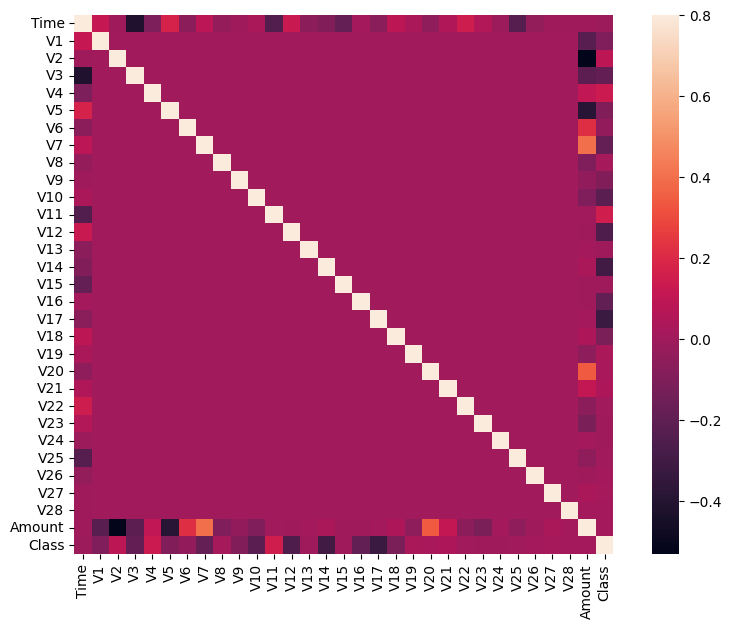

In [143]:
corrmat = df.corr()
fig = plt.figure(figsize = (10, 7))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [144]:
x = df.iloc[:, 0:30]
y = df.iloc[:, -1]

In [145]:
print(x.shape, y.shape)

(284807, 30) (284807,)


In [146]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)

In [147]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-NN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0,loss_function='Logloss', random_seed=42),
    'SVM': SVC()
}

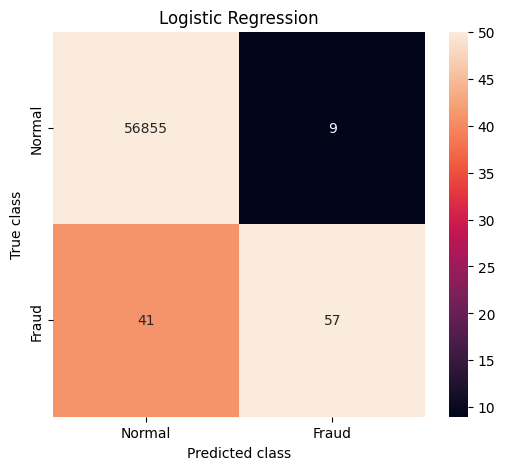

Accuracy:  0.9991222218320986
Precision:  0.8636363636363636
Recall:  0.5816326530612245
F1-Score:  0.6951219512195121
Matthews correlation coefficient:  0.708352596990073
--------------------------------------------------------------------------- 



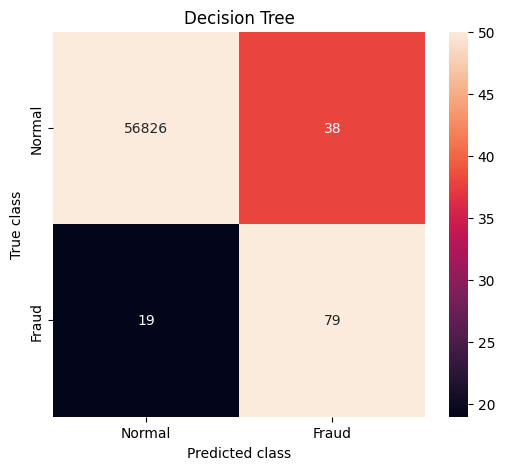

Accuracy:  0.9989993328885924
Precision:  0.6752136752136753
Recall:  0.8061224489795918
F1-Score:  0.7348837209302327
Matthews correlation coefficient:  0.7372818088049671
--------------------------------------------------------------------------- 



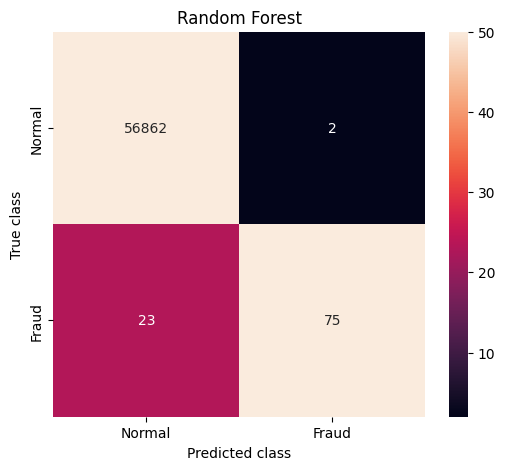

Accuracy:  0.9995611109160493
Precision:  0.974025974025974
Recall:  0.7653061224489796
F1-Score:  0.8571428571428571
Matthews correlation coefficient:  0.8631826952924256
--------------------------------------------------------------------------- 



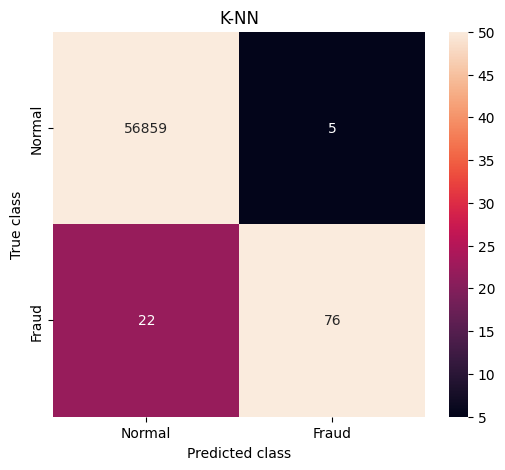

Accuracy:  0.9995259997893332
Precision:  0.9382716049382716
Recall:  0.7755102040816326
F1-Score:  0.8491620111731844
Matthews correlation coefficient:  0.8527935216307041
--------------------------------------------------------------------------- 



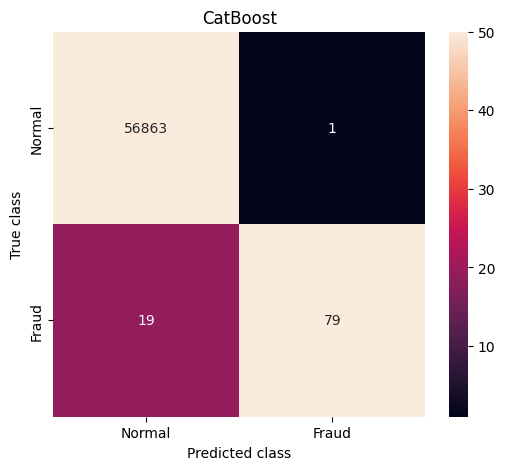

Accuracy:  0.9996488887328394
Precision:  0.9875
Recall:  0.8061224489795918
F1-Score:  0.8876404494382023
Matthews correlation coefficient:  0.8920534139482864
--------------------------------------------------------------------------- 



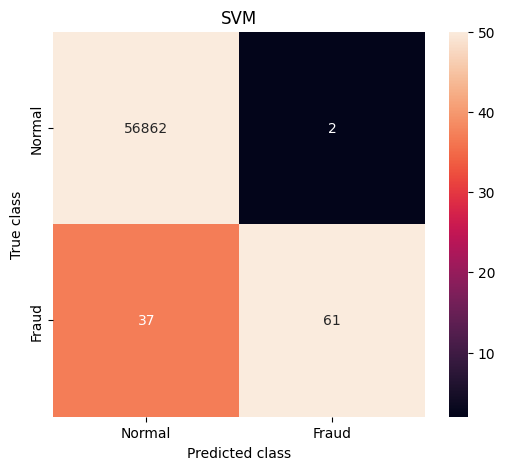

Accuracy:  0.9993153330290369
Precision:  0.9682539682539683
Recall:  0.6224489795918368
F1-Score:  0.7577639751552796
Matthews correlation coefficient:  0.7760476140536986
--------------------------------------------------------------------------- 



In [149]:
for name, model in models.items():
    model.fit(xtrain, ytrain)
    predict = model.predict(xtest)
    
    LABELS = ['Normal', 'Fraud']
    conf_matrix = confusion_matrix(ytest, predict)
    plt.figure(figsize =(6,5))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, vmax = 50, annot = True, fmt ="d");
    plt.title(f'{name}')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("Accuracy: ", accuracy_score(ytest, predict))
    print("Precision: ", precision_score(ytest, predict))
    print("Recall: ", recall_score(ytest, predict))
    print("F1-Score: ", f1_score(ytest, predict))
    print("Matthews correlation coefficient: ", matthews_corrcoef(ytest, predict))
    print('-' * 75, '\n')